## Find Markers / Label Cell Types

In [1]:
import scanpy as sc
import scvi
import seaborn as sns
import numpy as np
import pandas as pd

c:\Users\alexg\anaconda3\envs\bioenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = sc.read_h5ad('integrated.h5ad')
adata

AnnData object with n_obs × n_vars = 108822 × 21306
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden'
    var: 'n_cells'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [3]:
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)

C:\Users\alexg\AppData\Local\Temp\ipykernel_10680\4044276676.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


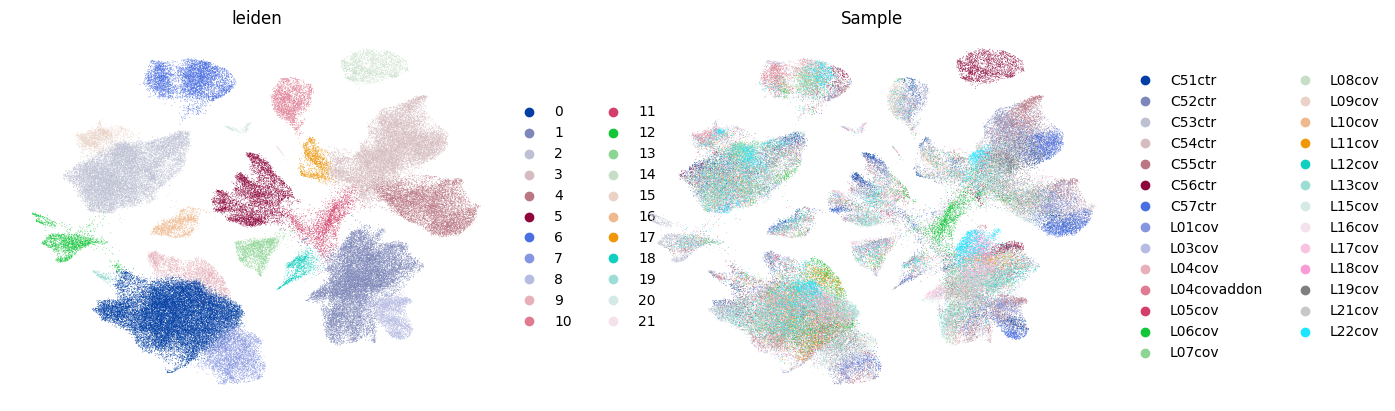

In [4]:
sc.pl.umap(adata, color = ['leiden', 'Sample'], frameon=False)

In [5]:
sc.tl.rank_genes_groups(adata, 'leiden')

c:\Users\alexg\anaconda3\envs\bioenv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
c:\Users\alexg\anaconda3\envs\bioenv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
c:\Users\alexg\anaconda3\envs\bioenv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:440: PerformanceWarning: DataFrame is h

In [6]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > 0.5)]
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,CTSB,202.182007,5.774914,0.000000,0.000000
1,0,LRMDA,179.877228,3.007319,0.000000,0.000000
2,0,FMN1,174.065826,4.088677,0.000000,0.000000
3,0,PLXDC2,171.822067,3.226328,0.000000,0.000000
4,0,SLC8A1,164.061111,4.198073,0.000000,0.000000
...,...,...,...,...,...,...
448167,21,AC002069.2,2.324119,4.409709,0.023207,0.049430
448168,21,SLIT3,2.322894,1.339971,0.023275,0.049569
448169,21,ZSWIM5,2.322421,2.199083,0.023303,0.049624
448170,21,SYNDIG1,2.322397,3.788571,0.023305,0.049624


In [7]:
markers_scvi = model.differential_expression(groupby = 'leiden')
markers_scvi

NameError: name 'model' is not defined